# Data visualization

### Loading required libraries


In [1]:
listPackages <- c('rgdal', 'ggplot2', 'ggmap', 'tidyverse', 'data.table', 
                  'scales', 'corrplot', 'gridExtra', 'treemap', 'RColorBrewer',
                 'rgdal')
newPackages <- listPackages[!(listPackages %in% installed.packages()[,'Package'])]
if(length(newPackages)) install.packages(newPackages)

rm(list = c('listPackages', 'newPackages'))

library(data.table)
library(tidyverse)
library(ggmap)
library(rgdal)
library(kableExtra)
library(scales)
library(corrplot)
library(gridExtra)
library(treemap)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()
Loading required package: sp
rgdal: version: 1.3-3, (SVN revision 759)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: /usr/share/gdal/2.2
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp versio

### Loading the data
We are going to load the clean dataset to visualize data structure.
As data is at state / länder level, it would be interesting to visualize it using geographical tools. For that, it will be necessary download shapefile file with polygon configuration.

In [2]:
# Dataset
load(file = '../data/datasetCarsFinal')
# Download dataset from Dropbox
download.file(url = 'https://www.dropbox.com/s/xuupzr8rfpeekyc/VG250_1Jan2011_WGS84.zip?dl=1',
              destfile = '../data/VG250_1Jan2011_WGS84.zip')

In [3]:
unzip(zipfile = '../data/VG250_1Jan2011_WGS84.zip', exdir = '../data/Germany_shapefile/')
shapefileLander <- readOGR('../data/Germany_shapefile/', layer = 'VG250_Bundeslaender', encoding = 'ISO-8859-15')

OGR data source with driver: ESRI Shapefile 
Source: "/home/rucoma/Dropbox/MOOCs/KSCHOOL/DATA SCIENCE/TFM/KSCHOOL_TFM_Used_Cars_Price/data/Germany_shapefile", layer: "VG250_Bundeslaender"
with 21 features
It has 14 fields


### Setting up chart themes

In order to maintain the look and feel amongst charts, is very useful to create themes. With themes we can set up every part of the chart. We are going to create a theme for charts and another for maps.

In [12]:
themeCharts <- ggplot2::theme(
  axis.title = element_text(colour = '#2D4471', size = 8),
  axis.text.x = element_text(colour = '#2D4471', size = 6, angle = 90, vjust = .5),
  axis.text.y = element_text(colour = '#2D4471', size = 6),
  axis.ticks = element_line(colour = '#2D4471'),
  axis.line = element_line(colour = '#2D4471'),
  legend.text = element_text(colour = '#2D4471', size = 6),
  legend.title = element_text(colour = '#2D4471', size = 6),
  panel.grid.major = element_line(colour = 'gray95', linetype = 1), #'#2D4471'
  plot.title = element_text(colour = '#2D4471', size = 12, face = 'bold'),
  plot.subtitle = element_text(colour = '#2D4471', size = 10),
  panel.background = element_rect(fill = '#FFFFFF'),
  legend.box.background = element_blank(),
  legend.key = element_blank()
  )

themeMaps <- theme(
  axis.title = element_blank(),
  axis.text.x = element_blank(),
  axis.text.y = element_blank(),
  axis.ticks = element_blank(),
  axis.line = element_blank(),
  legend.text = element_text(colour = '#2D4471', size = 10),
  legend.title = element_text(colour = '#2D4471', size = 12),
  plot.title = element_text(colour = '#2D4471', size = 18, face = 'bold'),
  plot.subtitle = element_text(colour = '#2D4471', size = 14),
  panel.background = element_rect(fill = '#FFFFFF'),
  legend.box.background = element_blank(),
  legend.key = element_blank(),
  panel.grid.major = element_blank(), 
  panel.grid.minor = element_blank()
)

### Charting numerical variables

Numerical and categorical variables require a different type of visualization. To facilitate the process we are going to create a function to charting a scatterplot of numerical variables.

In [14]:
## Using data frame variables as arguments in custom function
plotNumerical <- function(df, xvar, yvar, xName, yName, tit, subtit = NULL) {
  ggplot(df,
         aes_string(x = xvar, 
                    y= yvar)) +
    geom_point(alpha = 0.1, 
               color = '#D16666',
              size = 0.2) +
    scale_x_continuous(name = xName) +
    scale_y_continuous(name = yName, 
                       labels = scales::dollar_format(prefix = '€')) +
    labs(title = tit,
         subtitle = subtit) +
    themeCharts
}

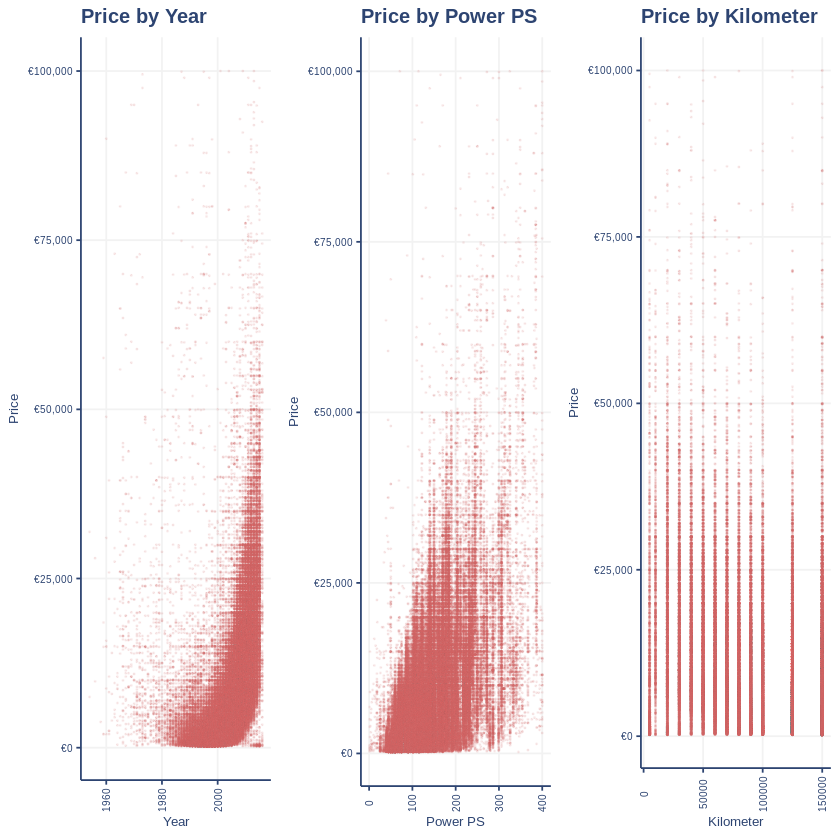

In [15]:
g1 <- plotNumerical(df = datasetCarsFinal, xvar = 'yearOfRegistration', yvar = 'price', xName = 'Year', yName = 'Price', tit = 'Price by Year')
g2 <- plotNumerical(df = datasetCarsFinal, xvar = 'powerPS', yvar = 'price', xName = 'Power PS', yName = 'Price', tit = 'Price by Power PS')
g3 <- plotNumerical(df = datasetCarsFinal, xvar = 'kilometer', yvar = 'price', xName = 'Kilometer', yName = 'Price', tit = 'Price by Kilometer')

grid.arrange(g1, g2, g3, nrow = 1)

Due to the huge amount of samples in the dataset, there is very difficult to see a pattern in price. Price against Year show a kind of exponential relationship, but it's hard to tell. Let's try to summarise price info in a boxplot and see what happens where Year is in x axis.

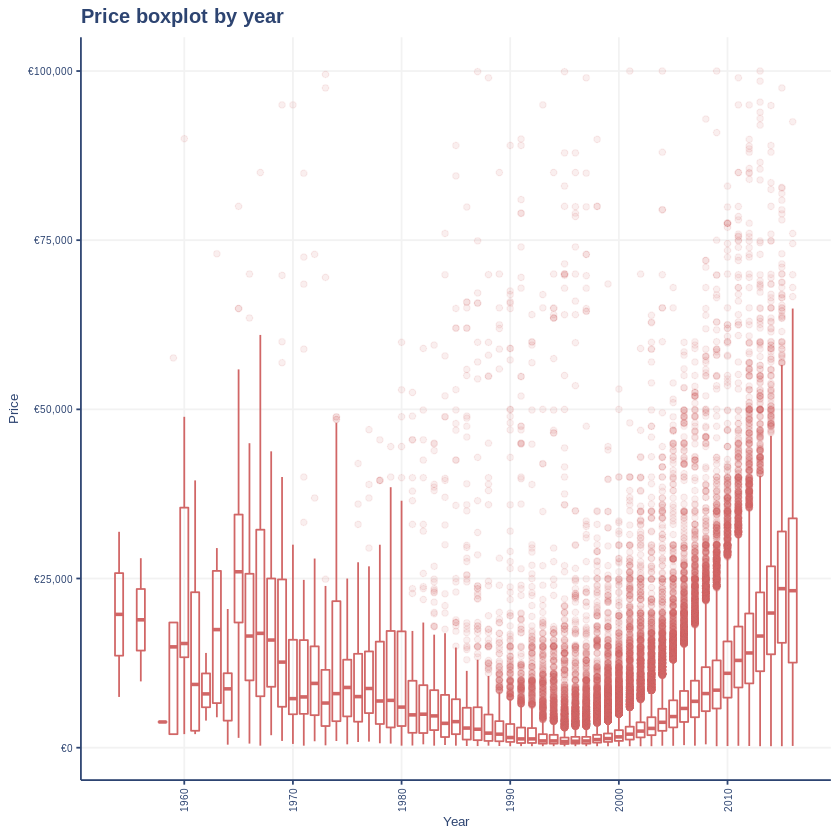

In [16]:
gBoxplot1 <- ggplot(data = datasetCarsFinal,
                    mapping = aes(x = yearOfRegistration,
                                  y = price,
                                  group = yearOfRegistration)) +
  geom_boxplot(alpha = 0.1, color = '#D16666') +
  labs(title = 'Price boxplot by year', subtitle = NULL) +
  scale_x_continuous(name = 'Year', breaks = seq(1950, 2020, by = 10)) +
  scale_y_continuous(name = 'Price', labels = scales::dollar_format(prefix = '€')) +
  themeCharts
gBoxplot1

We can observe a pattern in price, cars are losing value as they are older (minumum values at middle 90s) but they are revalued when they are over 25 years old.

### Correlation chart

Before modeling it's important to know correlation coefficient amongst numerical values. If some of them are very correlated we have risk of collinearity, and this could be trouble for modeling.

In [19]:
numericalCol <- c('yearOfRegistration', 'powerPS', 'kilometer', 'price')
datasetNumerical <- datasetCarsFinal[, ..numericalCol]

#plot(datasetNumerical)

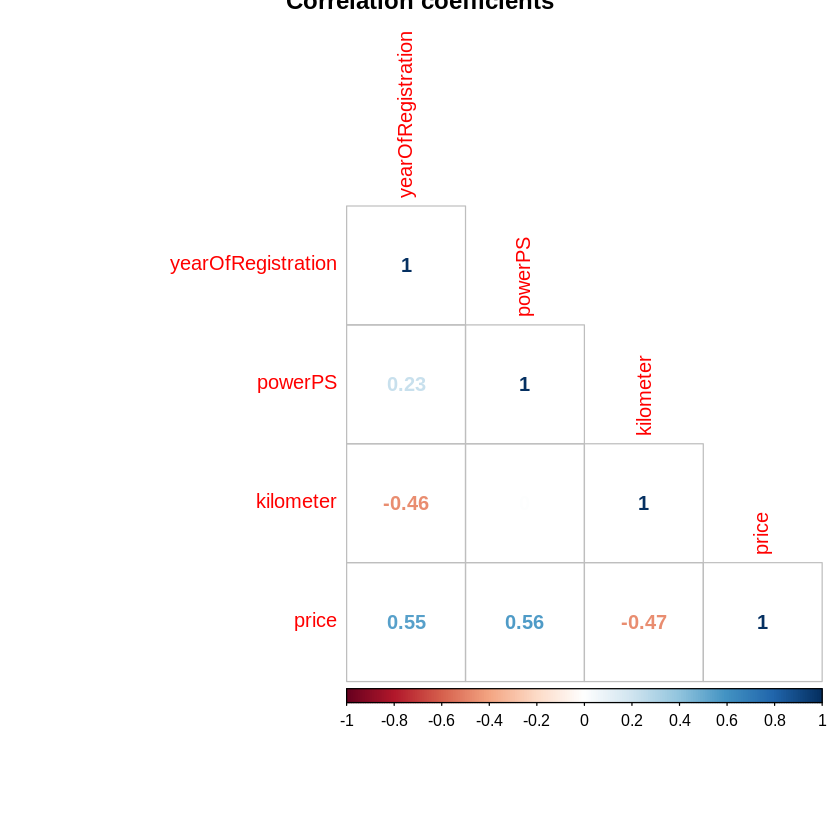

In [22]:
corrplot(cor(datasetNumerical), 
         method = 'number', 
         addCoef.col = T, 
         type = 'lower', 
         title = 'Correlation coefficients', 
         outline = T,
         tl.pos = 'ld',
         number.cex = 1)

Correlation coefficients are not very high (no more than 0.6), so we can conclude there's no collinearity between variables. So, we can continue with the analysis without applying any action over the variables.  
We observe a positive relation between price and year (as we saw above) and price and power PS. Price and kilometers have a negative relation: the more kilometers the car has, the less the price it costs.

### Charting categorical variables

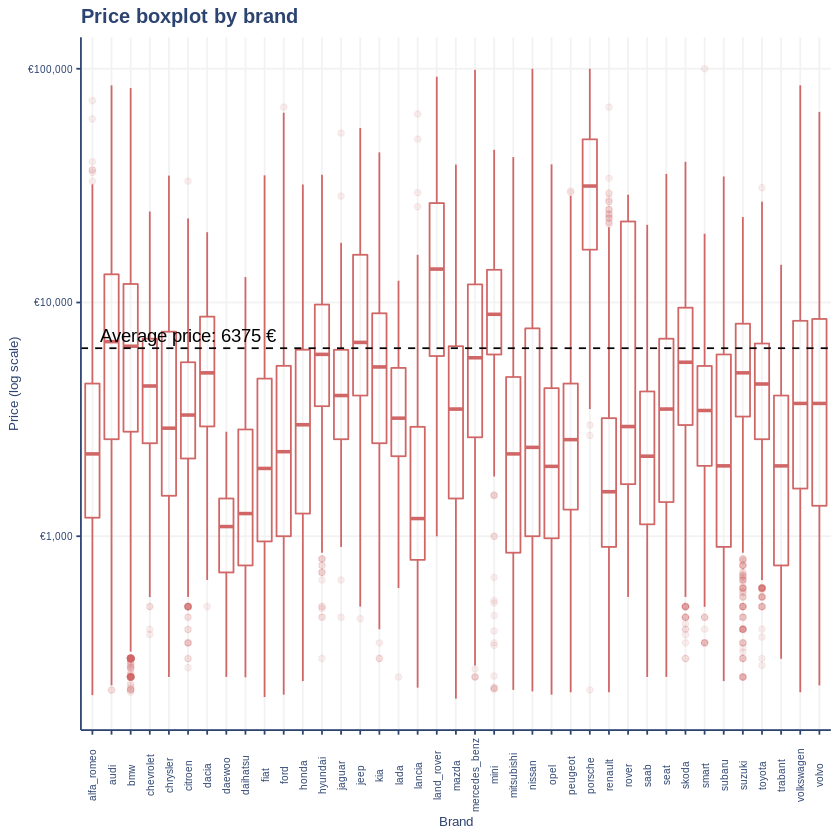

In [21]:
## Categorical variables
gBoxplot2 <- 
  ggplot(data = datasetCarsFinal,
                    mapping = aes(x = brand,
                                  y = price)) +
  geom_boxplot(alpha = 0.1, color = '#D16666') +
  geom_hline(yintercept = mean(datasetNumerical$price), linetype="dashed") +
  annotate(geom = 'text', x = 6, y = mean(datasetNumerical$price), label = paste0('Average price: ', sprintf('%4.0f €', round(mean(datasetNumerical$price), 0))), vjust = -.5) +
  labs(title = 'Price boxplot by brand', subtitle = NULL) +
  scale_x_discrete(name = 'Brand') +
  scale_y_log10(name = 'Price (log scale)', labels = scales::dollar_format(prefix = '€')) +
  
  themeCharts
gBoxplot2

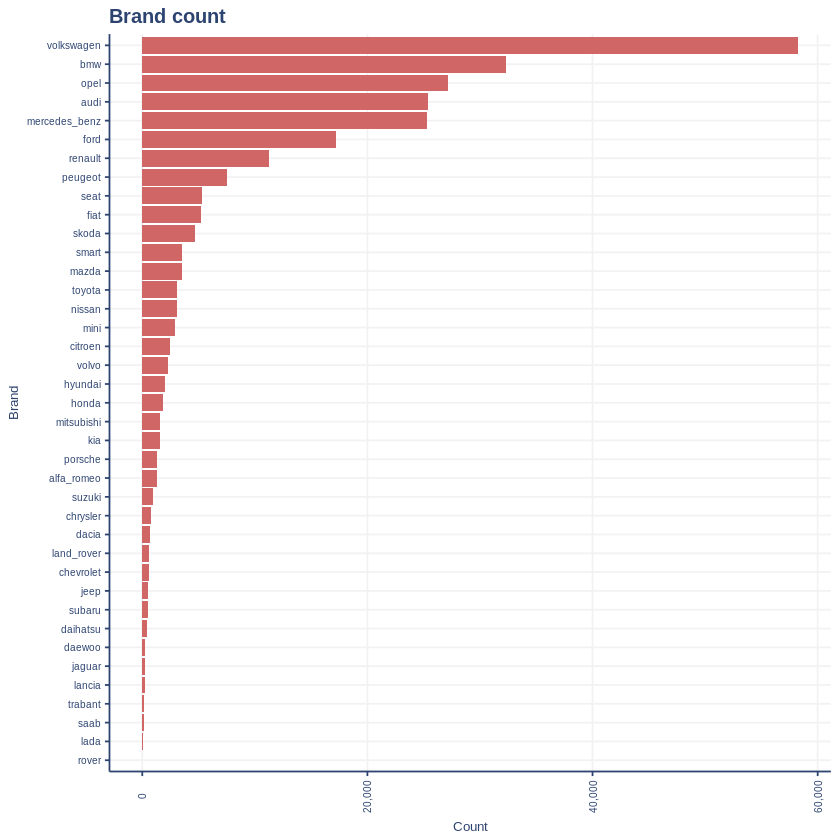

In [10]:
gCountBrand <- 
  ggplot(data = datasetCarsFinal[, .(N = .N), by = brand][order(-N)],
       mapping = aes(x = reorder(brand, N),
                     y = N)) +
  geom_col(fill = '#D16666') +
  coord_flip() +
  labs(title = 'Brand count', subtitle = NULL) +
  scale_x_discrete(name = 'Brand') +
  scale_y_continuous(name = 'Count', labels = comma) +
  themeCharts
gCountBrand

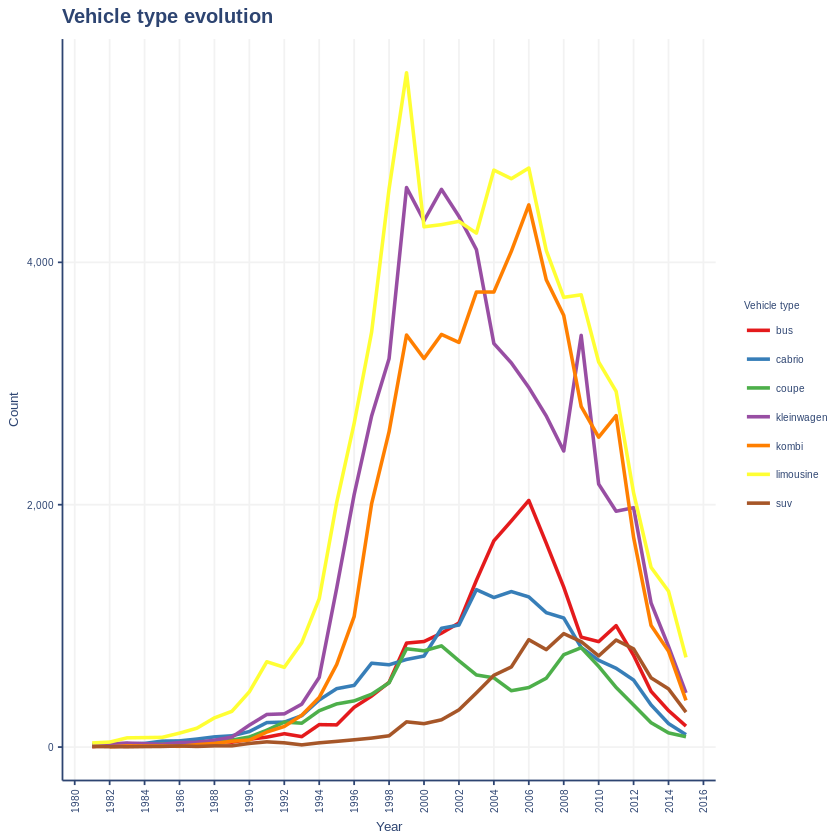

In [11]:
vehicleTypeEvol <- 
  ggplot(datasetCarsFinal[yearOfRegistration > 1980 & yearOfRegistration < 2016, .(N = .N), by =.(yearOfRegistration, vehicleType)],
         aes(x = yearOfRegistration,
             y = N,
             color = vehicleType)) +
  geom_line(size = 1) +
  scale_color_brewer(palette = 'Set1', name = 'Vehicle type') +
  scale_x_continuous(name = 'Year', breaks = seq(1980, 2020, by = 2)) +
  scale_y_continuous(name = 'Count', labels = comma) +
  labs(title = 'Vehicle type evolution', subtitle = NULL) +
  themeCharts
vehicleTypeEvol

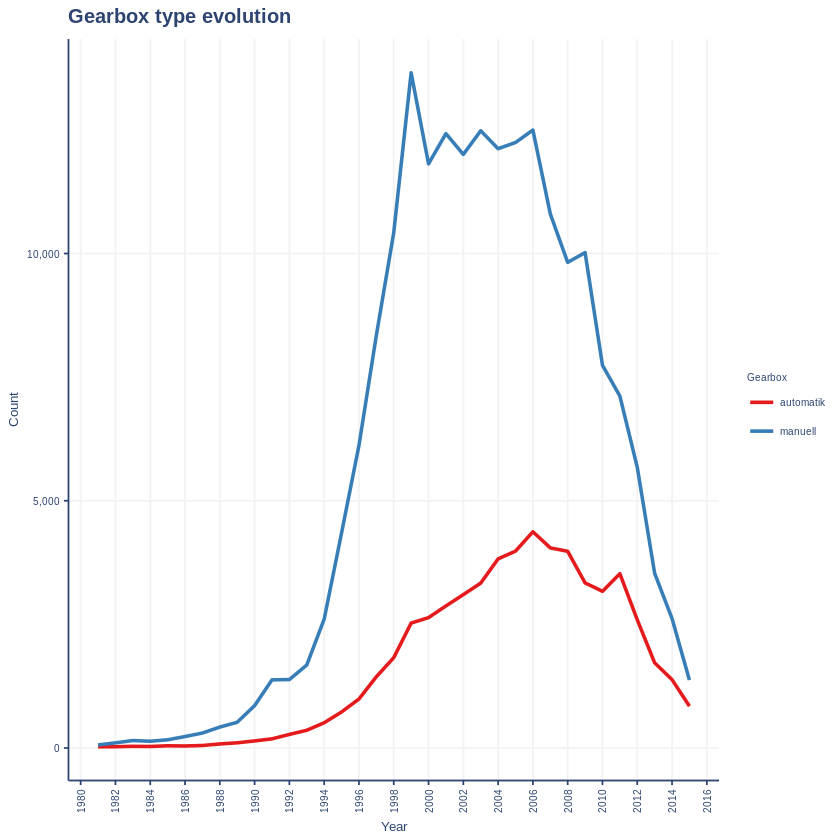

In [12]:
gearboxEvol <- 
  ggplot(datasetCarsFinal[yearOfRegistration > 1980 & yearOfRegistration < 2016, .(N = .N), by =.(yearOfRegistration, gearbox)],
         aes(x = yearOfRegistration,
             y = N,
             color = gearbox)) +
  geom_line(size = 1) +
  scale_color_brewer(palette = 'Set1', name = 'Gearbox') +
  scale_x_continuous(name = 'Year', breaks = seq(1980, 2020, by = 2)) +
  scale_y_continuous(name = 'Count', labels = comma) +
  labs(title = 'Gearbox type evolution', subtitle = NULL) +
  themeCharts
gearboxEvol

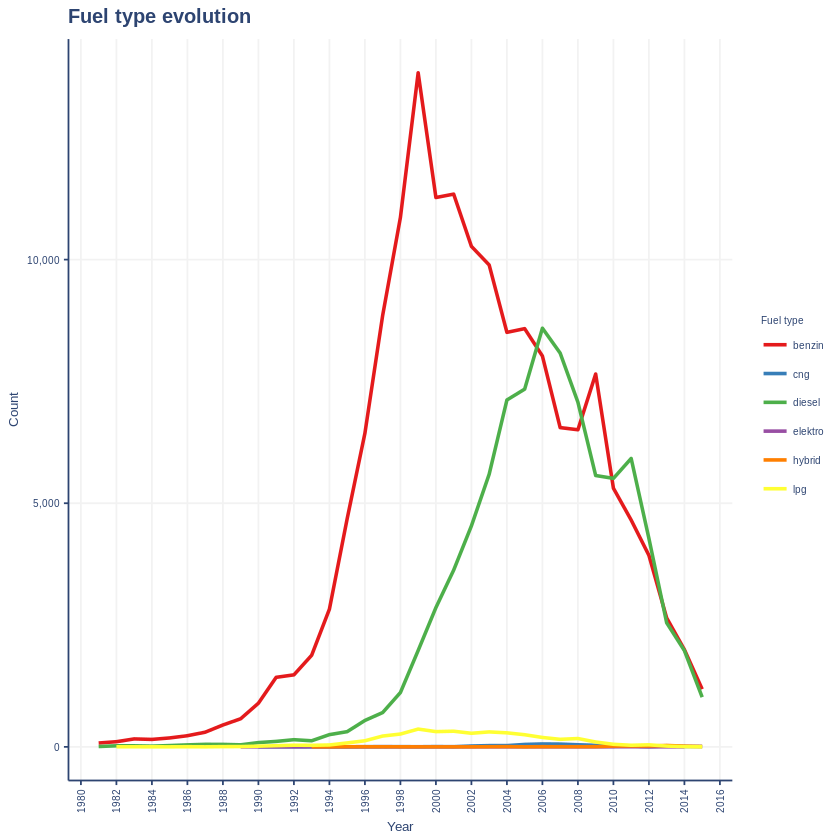

In [13]:
fuelTypeEvol <- 
  ggplot(datasetCarsFinal[yearOfRegistration > 1980 & yearOfRegistration < 2016, .(N = .N), by =.(yearOfRegistration, fuelType)],
         aes(x = yearOfRegistration,
             y = N,
             color = fuelType)) +
  geom_line(size = 1) +
  scale_color_brewer(palette = 'Set1', name = 'Fuel type') +
  scale_x_continuous(name = 'Year', breaks = seq(1980, 2020, by = 2)) +
  scale_y_continuous(name = 'Count', labels = comma) +
  labs(title = 'Fuel type evolution', subtitle = NULL) +
  themeCharts
fuelTypeEvol

### Treemap

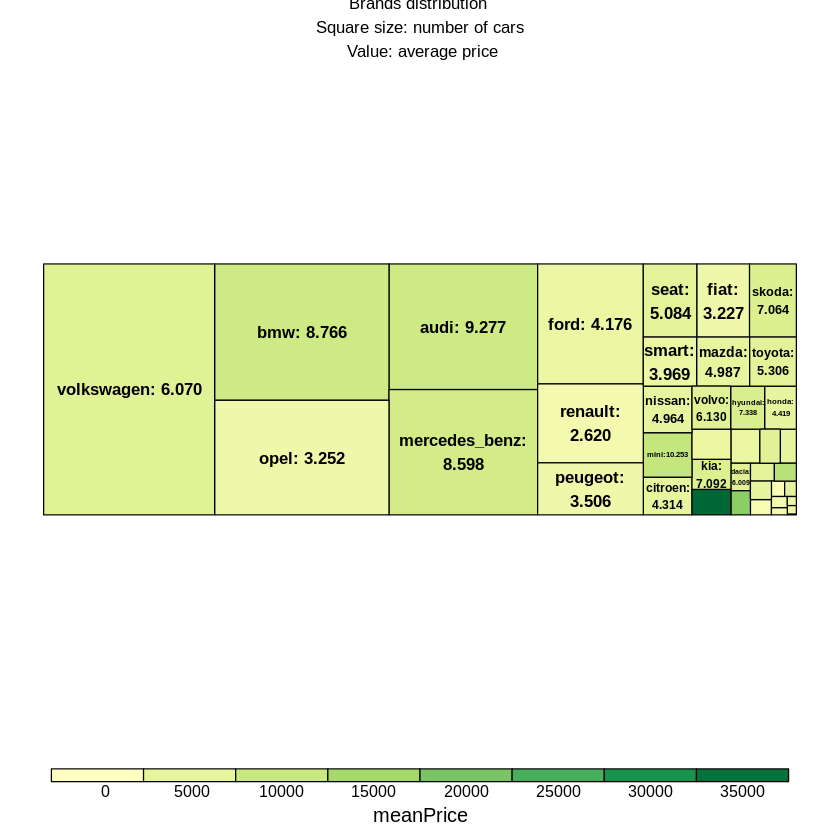

In [14]:
brandPrice <- datasetCarsFinal[, .(N = .N, meanPrice = mean(price)), by = brand]
brandPrice$label <- paste(brandPrice$brand, format(round(brandPrice$meanPrice, 0), big.mark = '.', decimal.mark = ','), sep = ':')
treeMapBrands <- 
  treemap(dtf = brandPrice,
        index = c('label'),
        vSize = 'N',
        vColor = 'meanPrice',
        type = 'value',
        fontsize.title = 10,
        fontsize.labels = 10,
        title = 'Brands distribution \n Square size: number of cars \n Value: average price',
        border.lwds = 1,
        aspRatio = 3)

## Mapping data

In [15]:
# Data for filling maps --------------------------------------------------------
avPriceLander <- datasetCarsFinal[, .(avPrice = mean(price)), by = state]
nCarsLander <- datasetCarsFinal[, .(N = .N), by = state]

In [16]:
# Manipulate shapefile to create a data frame with all necessary data ----------
mapDataFortifiedLander <- fortify(shapefileLander) %>% 
  mutate(id = as.numeric(id)) %>% 
  setDT()
dfLander <- data.frame(state = shapefileLander@data$GEN,
                      id = 0:20)

Regions defined for each Polygons


In [17]:
# Determining the centroid of every polygon
centroids <- as.data.frame(coordinates(shapefileLander)) %>% 
  rename(long = V1, lat = V2) %>% 
  mutate(id = seq(0, nrow(.) - 1)) %>% 
  left_join(., dfLander, by ='id') %>% 
  setDT()

In [18]:
mapDataMergedLander <- left_join(mapDataFortifiedLander, dfLander, by = 'id') %>% 
  left_join(., avPriceLander, by = 'state') %>% 
  left_join(., nCarsLander, by = 'state') %>%
  setDT()

In [19]:
notNecessaryIds <- c(14, 4, 11, 6, 13)

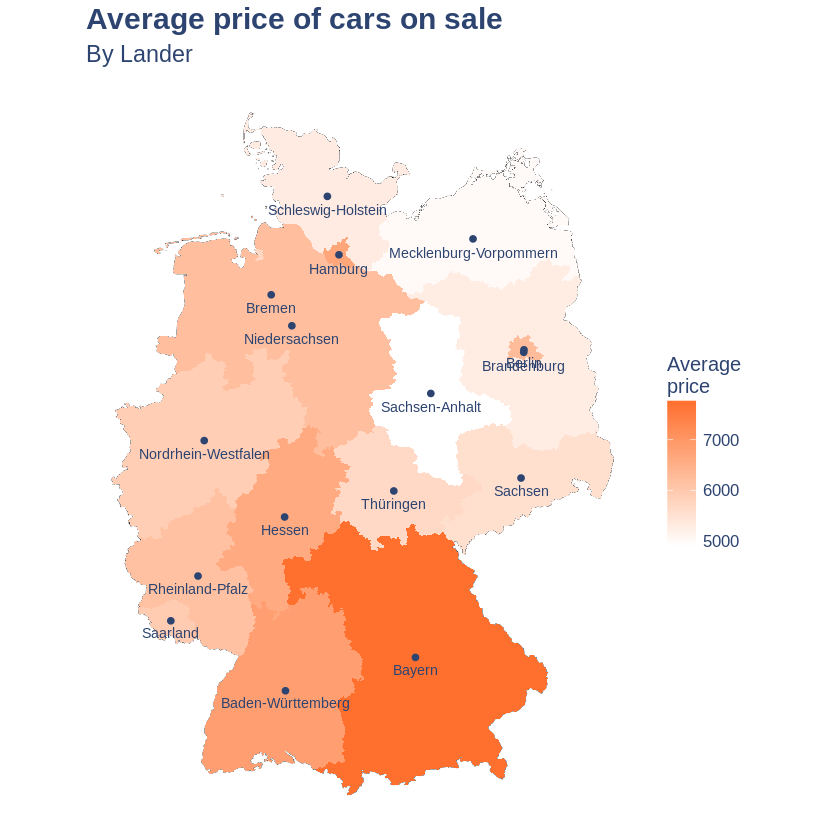

In [20]:
## Maps ------------------------------------------------------------------------
ggplot() +
  geom_path(data = mapDataMergedLander,
            mapping = aes(x = long, y = lat, group = group),
            color = 'black',
            size = .1) +
  geom_polygon(data = mapDataMergedLander,
               mapping = aes(x = long, y = lat, group = group, fill = avPrice)) +
  scale_fill_gradient(low = "white",
                      high = "#ff702f",
                      na.value = "grey",
                      space = "Lab",
                      name = 'Average \nprice') +
  geom_point(data = centroids[!(id %in% notNecessaryIds)],
             mapping = aes(x = long,
                           y = lat),
             colour ='#2D4471') +
  coord_map(projection = 'mercator') +
  geom_text(data = centroids[!(id %in% notNecessaryIds)],
            mapping = aes(x = long,
                          y = lat,
                          label = as.character(state)),
            size = 3,
            colour ='#2D4471',
            nudge_y = -0.15) +
  labs(title = 'Average price of cars on sale', subtitle = 'By Lander') +
  themeMaps

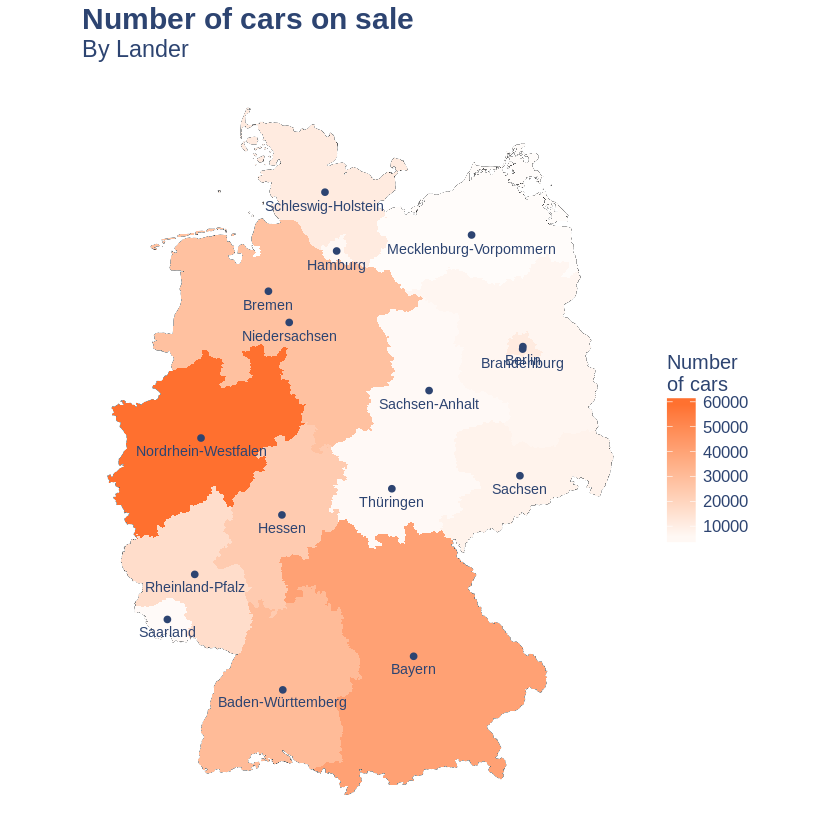

In [21]:
ggplot() +
  geom_path(data = mapDataMergedLander,
            mapping = aes(x = long, y = lat, group = group),
            color = 'black',
            size = .1) +
  geom_polygon(data = mapDataMergedLander,
               mapping = aes(x = long, y = lat, group = group, fill = N)) +
  scale_fill_gradient(low = "white",
                      high = "#ff702f",
                      na.value = "grey",
                      space = "Lab",
                      name = 'Number \nof cars') +
  geom_point(data = centroids[!(id %in% notNecessaryIds)],
             mapping = aes(x = long,
                           y = lat),
             colour ='#2D4471') +
  coord_map(projection = 'mercator') +
  geom_text(data = centroids[!(id %in% notNecessaryIds)],
            mapping = aes(x = long,
                          y = lat,
                          label = as.character(state)),
            size = 3,
            colour ='#2D4471',
            nudge_y = -0.15) +
  labs(title = 'Number of cars on sale', subtitle = 'By Lander') +
  themeMaps
